<a href="https://colab.research.google.com/github/brenddonandrade/tutorial-OSMnx/blob/main/tutorial_osmnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial - Introduction to OSMnx

## Author Identification and CNPq Acknowledgment

**Author:** Brenddon Oliveira

**Research Advisors:** Leonardo Bacelar Lima Santos, Antônio Miguel Vieira Monteiro, Giovanni Guarnieri Soares

---

In this research, I would like to express my sincere gratitude to the **National Council for Scientific and Technological Development (CNPq)** for their financial support and the opportunity to conduct this Undergraduate Research.


## Dependencies

In [ ]:
%%capture
!pip install osmnx mapclassify

In [ ]:
!pip show osmnx

Name: osmnx
Version: 1.6.0
Summary: Download, model, analyze, and visualize street networks and other geospatial features from OpenStreetMap
Home-page: 
Author: 
Author-email: Geoff Boeing <boeing@usc.edu>
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: geopandas, networkx, numpy, pandas, requests, shapely
Required-by: 


In [ ]:
import osmnx as ox
import copy
import networkx as nx
import plotly.express as px
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.constructive import normalize

import geopandas as gpd

## Getting Street Network

In [ ]:
# Parameters

# size of the network
distance = 1000

# Type of limiters
distance_type = 'bbox'

# Generate a network for "drive"
network_type = 'drive'

## Method 1 - center point

MultiDiGraph with 274 nodes and 507 edges


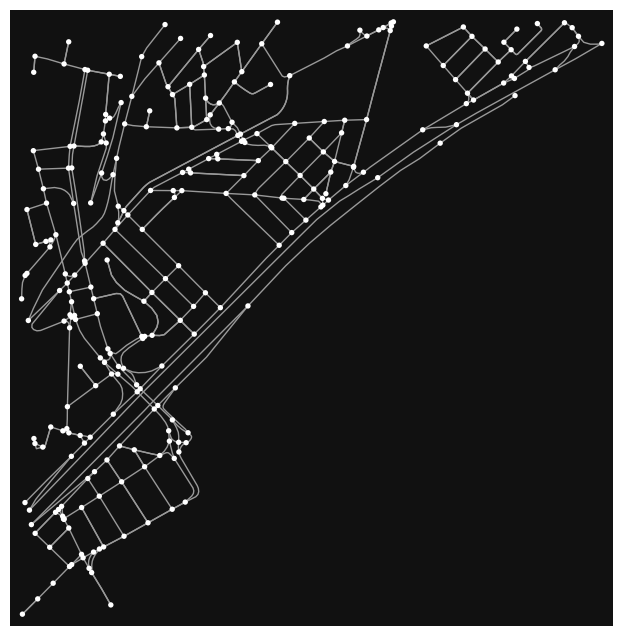

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
center_point = (-23.202,-45.878)
G_point = ox.graph.graph_from_point(center_point, distance, distance_type, network_type)
print(G_point)
# Plot network (simple) to demonstration
ox.plot.plot_graph(G_point)

## Method 2 - address

MultiDiGraph with 236 nodes and 608 edges


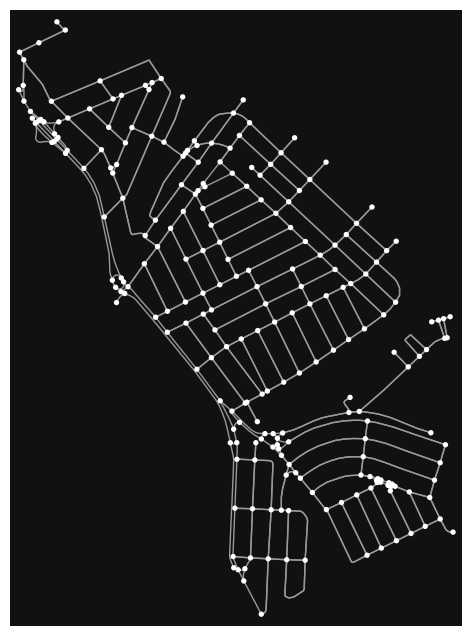

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
address = "Av. dos Astronautas, 1.758 - Jardim da Granja, São José dos Campos - SP, 12227-010"
G_address = ox.graph.graph_from_address(address, distance, distance_type, network_type)
print(G_address)
ox.plot.plot_graph(G_address)

## Method 3 - place

MultiDiGraph with 16161 nodes and 36676 edges


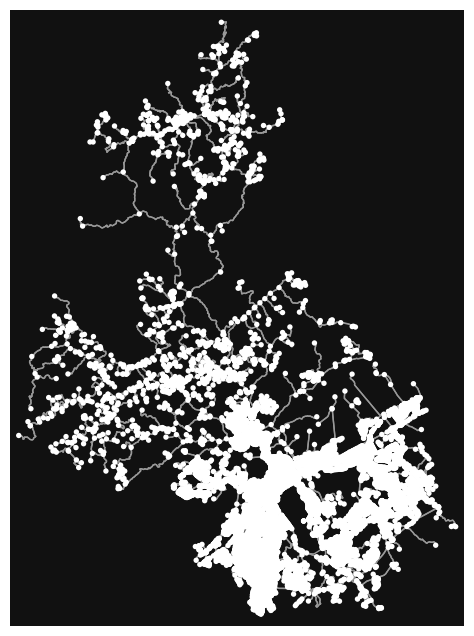

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
place = "São José dos Campos"
G_place = ox.graph_from_place(place, network_type=network_type)
print(G_place)
ox.plot.plot_graph(G_place)

## Method 4 - polygon

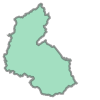

In [ ]:
gdf = gpd.read_file('/vsicurl/https://github.com/brenddonandrade/tutorial-OSMnx/raw/main/shape/SP_Municipios_2022.shp')
gdf_sjc = gdf[gdf.NM_MUN == "São José dos Campos"]
polygon = gdf_sjc.geometry.values[0]
polygon

MultiDiGraph with 16153 nodes and 36639 edges


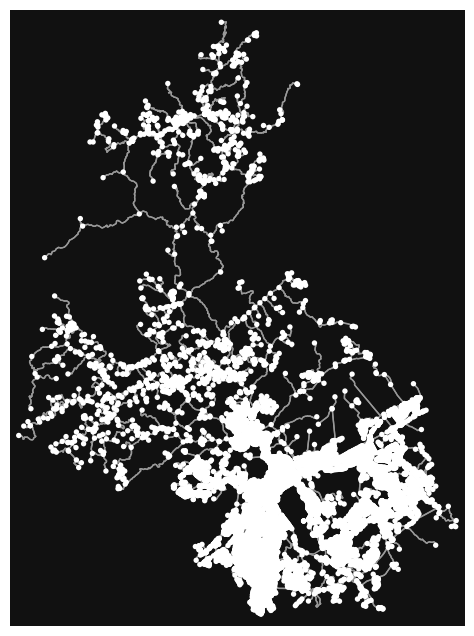

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G_poly = ox.graph_from_polygon(polygon, network_type=network_type)
print(G_poly)
ox.plot.plot_graph(G_poly)

It is interesting to note a slight difference of nodes and edges when making the graph with place or polygons



*   Place: 16161 nodes and 36676 edges;
*   Polygons: 16153 nodes and 36639 edges.

This can be caused by the difference in polygons, where one was obtained via [IBGE](https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html) (graph_from_polygon), and the other via an OSM geocode query (graph_from_place).






## Some modifications

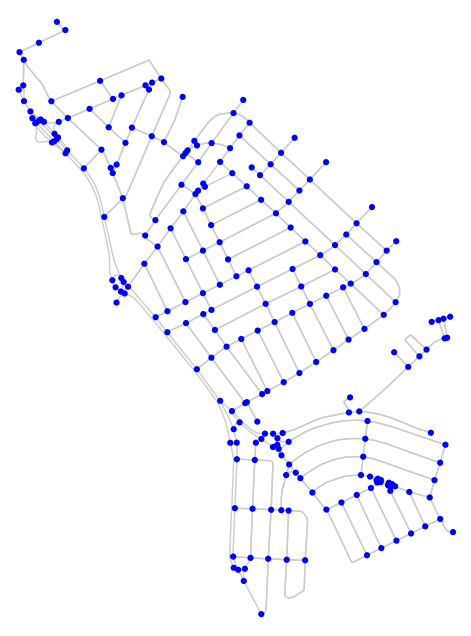

In [ ]:
# We can make modifications to the network plot and save the generated images:

fig, ax = ox.plot_graph(G_address, node_size=20, node_color = 'b',
                        edge_color= '#cccccc', edge_linewidth=1,
                        bgcolor = '#ffffff', )
fig.savefig('plot.png', dpi=300)

## Calculating and setting network attributes

In [ ]:
def create_graph(graph):

    # Nodes attributes
    # calculate node degree centrality
    dc = nx.degree_centrality(graph)
    nx.set_node_attributes(graph, values=dc, name="dc")

    # calculate node closeness centrality
    cc = nx.closeness_centrality(graph)
    nx.set_node_attributes(graph, values=cc, name="cc")

    # calculate node betweenness centrality
    bc = nx.betweenness_centrality(graph)
    nx.set_node_attributes(graph, values=bc, name="nbc")


    # Edges attributes
    # calculate edge betweenness centrality
    bce = nx.edge_betweenness_centrality(graph)
    nx.set_edge_attributes(graph, values=bce, name="ebc")

In [ ]:
# Getting measures
create_graph(G_address)
print(G_address)

MultiDiGraph with 236 nodes and 608 edges


## Support functions

### Plotting Network

In [ ]:
# Plotting
def plot_graph_for_node(graph, attribute):

     # get colors
    cmap = 'plasma'

    nc = ox.plot.get_node_colors_by_attr(graph, attr=attribute , cmap=cmap)
    norm = mpl.colors.Normalize(
        vmin=np.min(list(nx.get_node_attributes(graph, attribute).values())),
        vmax=np.max(list(nx.get_node_attributes(graph, attribute).values())))

    # plot graph and add colorbar
    fig, ax = ox.plot_graph(graph, edge_linewidth=0.3, node_size=25,
                            node_color=nc, show=False, bgcolor='lightgray')
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),  label = attribute)
    fig.savefig(f'{attribute}.png', dpi=300)

In [ ]:
# Plotting
def plot_graph_for_edge(graph, attribute):

     # get colors
    cmap = 'plasma'

    nc = ox.plot.get_edge_colors_by_attr(graph, attr=attribute , cmap=cmap)
    norm = mpl.colors.Normalize(
        vmin=np.min(list(nx.get_edge_attributes(graph, attribute).values())),
        vmax=np.max(list(nx.get_edge_attributes(graph, attribute).values())))

    # plot graph and add colorbar
    fig, ax = ox.plot_graph(graph, edge_linewidth=1, node_size=0, edge_color=nc,
                            show=False, bgcolor='lightgray')
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), label = attribute)
    fig.savefig(f'{attribute}.png', dpi=300)

### Plotting Histogram - N impact

In [ ]:
def plot_histogram(name, series):
    fig = px.histogram(series)
    fig.update_layout(title= name, width=600, height=400)
    fig.show()

# Measures Centrality

## Degree


<ipython-input-14-fdedf3928a53>:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),  label = attribute)


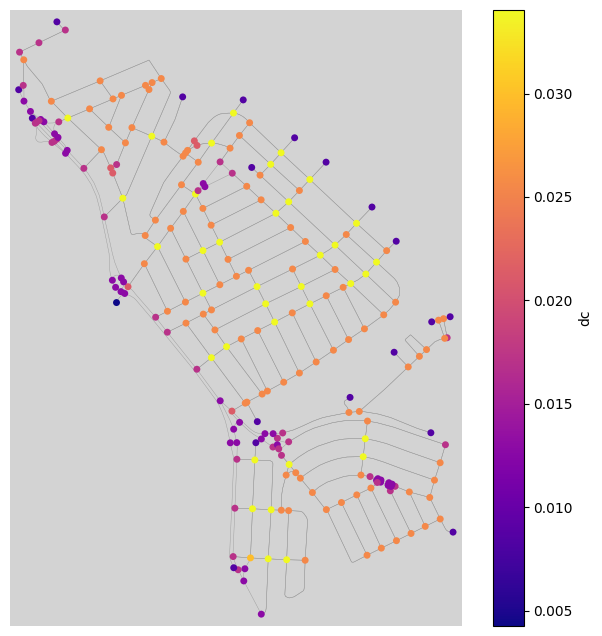

In [ ]:
plot_graph_for_node(G_address, 'dc')

## Closeness


<ipython-input-14-fdedf3928a53>:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),  label = attribute)


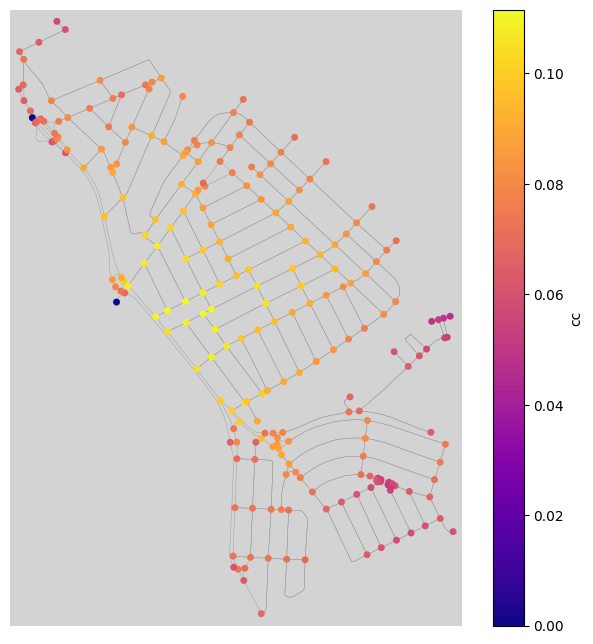

In [ ]:
plot_graph_for_node(G_address, 'cc')

## Betweenness (nodes)


<ipython-input-14-fdedf3928a53>:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),  label = attribute)


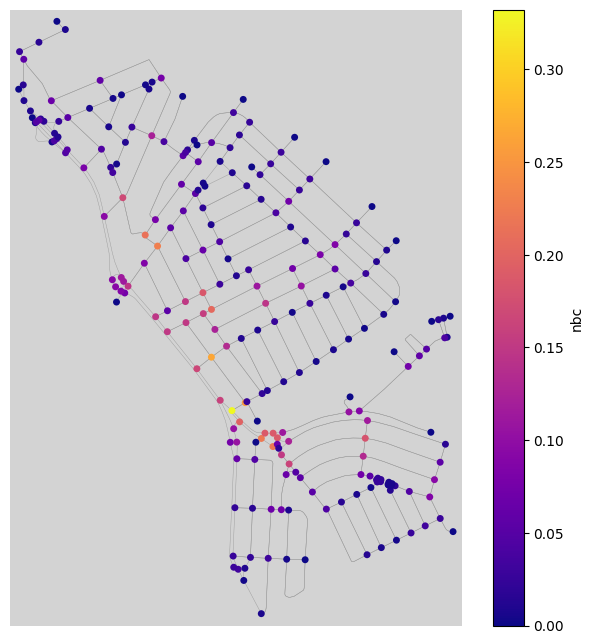

In [ ]:
plot_graph_for_node(G_address, 'nbc')

## Betweenness (edges)

<ipython-input-15-2f700969b6a8>:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), label = attribute)


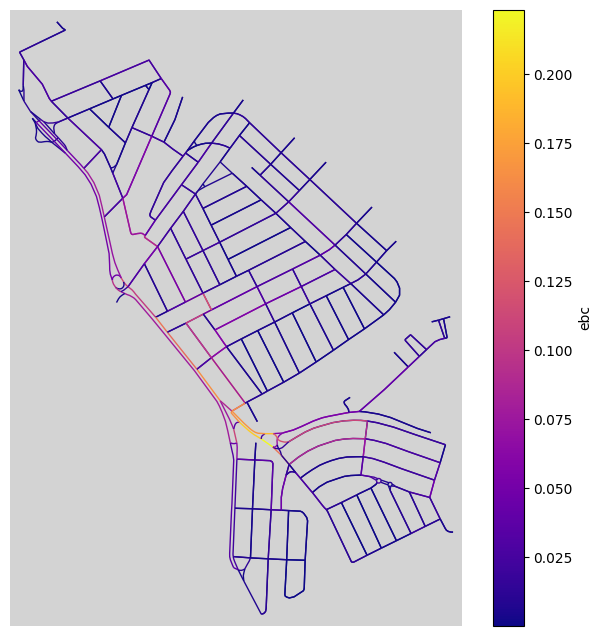

In [ ]:
plot_graph_for_edge(G_address, 'ebc')

# Map and polygon plots

In [ ]:
def graph_folium_bg(G, n_attribute = None, e_attribute = None, cmap = "hot"):
    nodes, edges = ox.graph_to_gdfs(G)
    m = edges.explore(column = e_attribute, cmap = cmap, color = "black")
    m = nodes.explore(m=m, column = n_attribute, cmap = cmap, color = "black")
    return m

In [ ]:
graph_folium_bg(G_address, "nbc", "ebc")

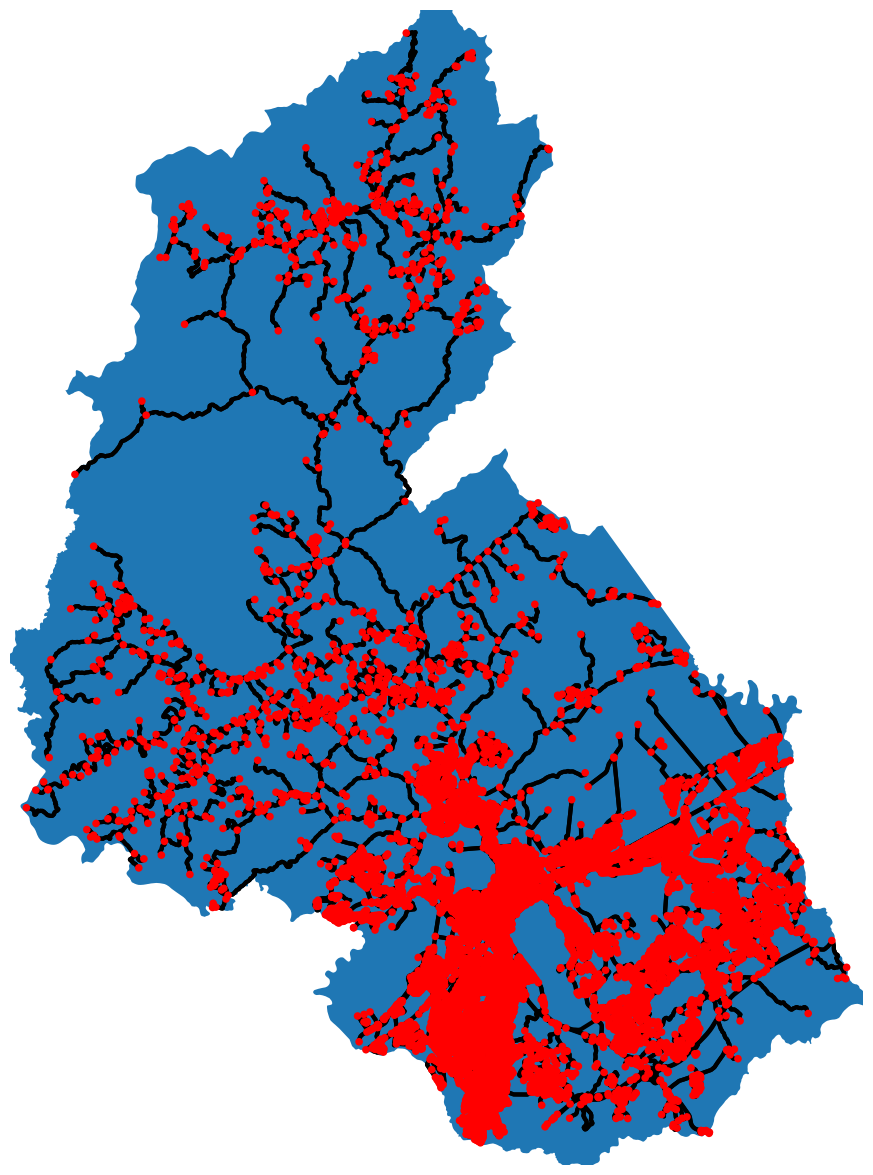

In [ ]:
ax = gdf_sjc.plot(figsize = (15,15))

fig, ax = ox.plot_graph(
    G_poly, ax=ax, bgcolor='w', edge_color='k', node_color='red', node_size=30, edge_linewidth=3, figsize = (15,15), show=False, close=False,
)


We also can obtain polygons from OSMNx

In [ ]:
gdf_sjc_ox = ox.geocode_to_gdf('São José dos Campos')
# m = graph_folium_bg(G_place) # disconnecting the session, resource heavy
gdf_sjc_ox.explore()

In [ ]:
gdf_sjc_ox

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-46.10700 -23.09600, -46.10000 -23.1...",-22.816595,-23.306118,-45.72652,-46.107,40714221,relation,298019,-23.186778,-45.885454,boundary,administrative,16,0.548629,municipality,São José dos Campos,"São José dos Campos, Região Imediata de São Jo..."
